# ML Course 7 - Practice on discriminant analysis

We will work here on a data set taken from Scikit-Learn about the characteristics of malignant and benign breast tumors to prevent the risk of cancer.

## Preparation of the data set

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 
import seaborn as sns

**Loading the data set from Scikit-Learn**

In [46]:
from sklearn.datasets import load_breast_cancer
data_all = load_breast_cancer()

**Checking the keys of the dictionary loaded**

In [47]:
data_all.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

**Getting a description of the data set**

In [48]:
print(data_all.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

**Preparing the data frame of all features**

In [49]:
data_all.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [50]:
features = pd.DataFrame(data=data_all.data, columns=data_all.feature_names)
features.sample(n=8, random_state=1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
421,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.13120,0.36350,0.3219,0.11080,0.2827,0.09208
47,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,15.67,27.95,102.80,759.4,0.17860,0.41660,0.5006,0.20880,0.3900,0.11790
292,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,0.1730,0.06470,...,13.74,19.93,88.81,585.4,0.14830,0.20680,0.2241,0.10560,0.3380,0.09584
186,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.24450,0.3538,0.15710,0.3206,0.06938
414,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,0.1852,0.05294,...,17.26,36.91,110.10,931.4,0.11480,0.09866,0.1547,0.06575,0.3233,0.06165
132,16.16,21.54,106.20,809.8,0.10080,0.12840,0.10430,0.05613,0.2160,0.05891,...,19.47,31.68,129.70,1175.0,0.13950,0.30550,0.2992,0.13120,0.3480,0.07619
161,19.19,15.94,126.30,1157.0,0.08694,0.11850,0.11930,0.09667,0.1741,0.05176,...,22.03,17.81,146.60,1495.0,0.11240,0.20160,0.2264,0.17770,0.2443,0.06251
197,18.08,21.84,117.40,1024.0,0.07371,0.08642,0.11030,0.05778,0.1770,0.05340,...,19.76,24.70,129.10,1228.0,0.08822,0.19630,0.2535,0.09181,0.2369,0.06558


**Preparing the data frame of the target**

In [51]:
target = pd.DataFrame(data=data_all.target, columns=['tumor type'])
target.sample(n=8, random_state=1)

,tumor type
421,1
47,0
292,1
186,0
414,0
132,0
161,0
197,0


In [52]:
data_all.target_names

array(['malignant', 'benign'], dtype='<U9')

**To make it easier to do visual check of the data, we remove the encoding**

In [53]:
target = target.replace({0:data_all.target_names[0], 1:data_all.target_names[1]})
target.sample(n=8, random_state=1)

,tumor type
421,benign
47,malignant
292,benign
186,malignant
414,malignant
132,malignant
161,malignant
197,malignant


## Subject

* As a start, we consider mean radius as unique predictor and we will compute a Linear Discrimant Analysis by hand.
  * Plot the data set on one axis (the mean radius axis) and give colors to distinguish the tumor type of each dot (i.e. each class)
  * Compute the estimated center of each class, i.e. $\hat{\mu}_k$ for $k \in \left\{0, 1\right\}$ (0 coding benign and 1 coding malignant). Add the center dots on your plot.
  * Compute the estimated prior $\hat{\pi}_k$ and variance $\hat{\sigma}_k^2$ of each class.
  * Plot the posterior of each class, i.e. the probability that a new observation comes from class $k$, knowing its mean radius value. We assume that these probality function follows a Gaussian distribution whose parameters have been computed in the latter questions.
  * According to the plot, what value of mean radius corresponds to the decision boundary?
  * *Optional question: check that by solving the equation of discriminant equality $\delta_0\left(x\right) = \delta_1\left(x\right)$*
  * Use LinearDiscriminantAnalysis (from sklearn.discriminant_analysis) to train a model and make several predictions around the decision boundary to check.
* We consider two predictors now: mean radius and mean texture.
  * Plot on a first figure the data in the 2D-predictor space with colors corresponding to the tumor type
  * Display on that first figure the decision areas based on the logistic regression classifier trained on the two predictors (see practice #6)
  * Train a Linear Discriminant Analysis on the two predictors and display the decision areas on a second figure
  * Train a Quadratic Discriminant Analysis on the two predictors and display the decision areas on a third figure
  * *Optional question: compare the performances of that three models*

In [97]:
df1 = pd.concat([features,target], axis=1)

<AxesSubplot:xlabel='tumor type', ylabel='mean radius'>

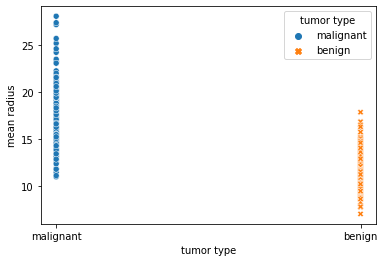

In [98]:
sns.scatterplot(data=df1, x="tumor type", y="mean radius",hue="tumor type",style="tumor type")

C:\Users\choha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tumor type', ylabel='count'>

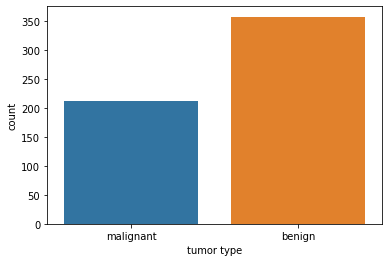

In [99]:
sns.countplot(df1["tumor type"], )

In [100]:
print(df1['tumor type'].value_counts())

benign       357
malignant    212
Name: tumor type, dtype: int64


In [101]:
benign = df1[df1['tumor type']==0]

In [102]:
maligtant = df1[df1['tumor type']==1]

C:\Users\choha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


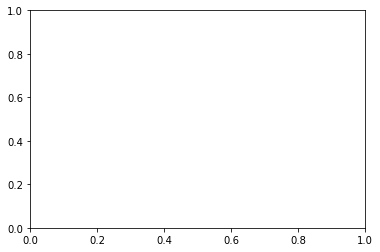

In [103]:
sns.scatterplot(malignant['mean radius'], np.zeros(len(malignant)), s=100, alpha=0.09, c='b')
sns.scatterplot(benign['mean radius'], np.zeros(len(benign)), s=100, alpha=0.09, c='g')
plt.show()

In [104]:
#mean 
mean = df1['mean radius'].sum()/df1.shape[0]

In [105]:
print(mean)

14.127291739894552


In [106]:
maligtantmean = df1['mean radius'].sum()/212

In [107]:
print(maligtantmean)

37.917117924528306


In [108]:
benignmean = df1['mean radius'].sum()/357

In [109]:
print(benignmean)

22.516607843137255


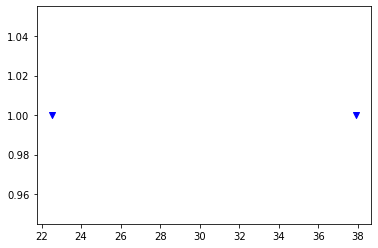

In [146]:
plt.scatter(malignant['mean radius'], np.zeros(len(maligtant)), s=100, alpha=0.5, c='b')
plt.scatter(benign['mean radius'], np.zeros(len(benign)), s=100, alpha=0.5, c='g')
plt.scatter(benignmean, 1, marker='v', c='blue')
plt.scatter(maligtantmean, 1, marker='v', c='blue')
plt.show()

In [141]:
value1 = sum([(item-benignmean)**2 for item in benign['mean radius'].tolist()])/212
print(value1)

0.0


In [117]:
X = df1[['mean radius']].values
print(X[:10])

[[17.99]
 [20.57]
 [19.69]
 [11.42]
 [20.29]
 [12.45]
 [18.25]
 [13.71]
 [13.  ]
 [12.46]]


In [120]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(target['tumor type'])
print(y[:10])

[1 1 1 1 1 1 1 1 1 1]


In [125]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (426, 1) (426,)
Test set: (143, 1) (143,)


In [127]:
from sklearn.linear_model import LogisticRegression
log_reg = {'classifier': LogisticRegression()}
# classifier = LogisticRegression(C=0.01, solver='liblinear')
log_reg['classifier'].fit(X_train, y_train)

LogisticRegression()

In [128]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
lda = {'classifier': LinearDiscriminantAnalysis()}
lda['classifier'].fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [129]:
print(label_encoder.inverse_transform(lda['classifier'].predict(sc.transform([[30]]))))

['benign']


In [130]:
print(label_encoder.inverse_transform(lda['classifier'].predict(sc.transform([[210]]))))

['malignant']


In [131]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
qda = {'classifier': QuadraticDiscriminantAnalysis()}
qda['classifier'].fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [132]:
qda['y_proba'] = qda['classifier'].predict_proba(X_test)
qda['y_pred'] = qda['classifier'].predict(X_test)
qda['y_score'] = qda['y_proba'][:,1]